<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   country_name     213 non-null    object 
 1   year             213 non-null    int64  
 2   gdp              213 non-null    float64
 3   social_support   213 non-null    float64
 4   freedom          213 non-null    float64
 5   trust            213 non-null    float64
 6   generosity       213 non-null    float64
 7   happiness_score  213 non-null    float64
dtypes: float64(6), int64(1), object(1)
memory usage: 13.4+ KB
None
                      gdp  social_support   freedom     trust  generosity  happiness_score
gdp              1.000000        0.303825  0.304592  0.515276    0.188318         0.679889
social_support   0.303825        1.000000  0.372269  0.225077    0.033404         0.465098
freedom          0.304592        0.372269  1.000000  0.571860    0.433534         0.605042
trus

<AxesSubplot:>

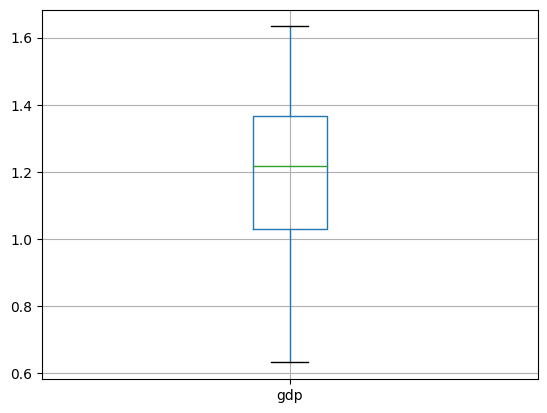

In [4]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.pyplot import show
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

# configurations
pd.options.display.max_rows = 1000
pd.options.display.max_columns = 1000
pd.set_option('display.expand_frame_repr', False)


def regression(x, y, max_degree):
    Xtrain, Xtest, Ytrain, Ytest = train_test_split(x, y, test_size=0.3, random_state=4)
    reg = make_pipeline(PolynomialFeatures(degree=max_degree), LinearRegression())
    reg.fit(Xtrain, Ytrain)
    Ypredicted = []
    for i in range(0, Xtest.__len__()):
        Ypredicted.append(reg.predict([Xtest[i]])[0])

    R2 = r2_score(Ytest, Ypredicted)

    coef = reg['linearregression'].coef_
    w0 = reg['linearregression'].intercept_
    return coef, w0, R2, reg


def main_work(df):
    x = []
    for i in range(0, df.__len__()):
        tmp = df.loc[i].to_numpy()
        tmp = np.delete(tmp, df.columns.size - 1, 0)
        x.append(tmp)
    y = df['happiness_score'].to_numpy()

    coef, w0, R2, reg = regression(x, y, 1)
    print('degree 1: ', R2)

    printProjection(df, reg, 'gdp', 1000)
    printProjection(df, reg, 'trust', 1000)
    printProjection(df, reg, 'social_support', 1000)
    printProjection(df, reg, 'freedom', 1000)
    printProjection(df, reg, 'generosity', 1000)
    pass


def printProjection(df, regression, argument_name, detalization):
    xReg = []

    argument_position = df.columns.tolist().index(argument_name)
    max_value = df[argument_name].max()
    step = max_value / detalization
    arg_value = 0
    while arg_value <= max_value:
        tmp = [0, 0, 0, 0, 0]
        tmp[argument_position] = arg_value
        xReg.append(tmp)
        arg_value += step

    plt.figure(figsize=(5, 5))
    plt.title('Regression')
    plt.xlabel(argument_name)
    plt.ylabel('happiness')
    plt.grid(linestyle='--')

    plt.plot(np.linspace(0, max_value, len(xReg)).reshape(-1, 1), regression.predict(xReg), color='red')
    plt.scatter(df[argument_name].to_numpy(), df['happiness_score'])

    plt.show()
    pass


# program
df = pd.read_csv('../data/main_view.csv', sep=',', decimal='.')

df.info()

df.drop(columns=['country_name', 'year'], inplace=True)

print(df.corr())


df.boxplot(column=['gdp'])
#main_work(df)
